CHICAGO CAR CRASHES: Phase 3 Project



Project by Marion Macharia.

INTRODUCTION
            

Overview

The purpose of this project is to provide the Chicago Department of Transportation (CDOT) with valuable understanding regarding the factors that most contribute to an increase in several crashes both serious injury and fatalities and finding a predictive model that can be used to make recommendations to the city in order to help reduce injuries and create safer roads and driving conditions.


Business Understanding

Chicago Department of Transportation would like to find ways to decrease fatal car accidents.

Using the data from Chicago Data Portal, we would like to determine the key features that predict a fatal car crash and make appropriate recommendations.

1.Loading Libraries

In [61]:

# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats as stats

from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipe

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,\
precision_recall_fscore_support, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_validate, cross_val_predict, cross_val_score



In [4]:
# loading csv datasets
crashes_df = pd.read_csv('Data/Traffic_Crashes_Vehicles.csv', low_memory=False)
people_df = pd.read_csv('Data/Traffic_Crashes_People.csv', low_memory=False)


In [75]:
crashes_df.head()

,CRASH_UNIT_ID,CRASH_RECORD_ID,CRASH_DATE,UNIT_NO,UNIT_TYPE,NUM_PASSENGERS,VEHICLE_ID,CMRC_VEH_I,MAKE,MODEL,...,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT,VEHICLE_CONFIG,CARGO_BODY_TYPE,LOAD_TYPE,HAZMAT_OUT_OF_SERVICE_I,MCS_OUT_OF_SERVICE_I,HAZMAT_CLASS
0,1717556,7b1763088507f77e0e552c009a6bf89a4d6330c7527706...,12/06/2023 03:24:00 PM,1,DRIVER,NaN,1634931.0,NaN,NISSAN,SENTRA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1717574,2603ff5a88f0b9b54576934c5ed4e4a64e8278e005687b...,12/06/2023 04:00:00 PM,2,DRIVER,NaN,1634978.0,NaN,CHRYSLER,SEBRING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1717579,a52ef70e33d468b855b5be44e8638a564434dcf99c0edf...,12/06/2023 04:30:00 PM,1,DRIVER,NaN,1634948.0,NaN,SUBARU,OUTBACK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1720118,609055f4b1a72a44d6ec40ba9036cefd7c1287a755eb6c...,12/10/2023 12:12:00 PM,1,DRIVER,NaN,1637401.0,NaN,TOYOTA,RAV4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1720119,609055f4b1a72a44d6ec40ba9036cefd7c1287a755eb6c...,12/10/2023 12:12:00 PM,2,DRIVER,NaN,1637408.0,NaN,SUBARU,OUTBACK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
crashes_df.isna().mean()

CRASH_UNIT_ID              0.000000
CRASH_RECORD_ID            0.000000
CRASH_DATE                 0.000000
UNIT_NO                    0.000000
UNIT_TYPE                  0.001250
                             ...   
CARGO_BODY_TYPE            0.991997
LOAD_TYPE                  0.992349
HAZMAT_OUT_OF_SERVICE_I    0.993010
MCS_OUT_OF_SERVICE_I       0.992875
HAZMAT_CLASS               0.999356
Length: 71, dtype: float64

In [7]:
people_df.head()

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,SEX,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,M,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,827212.0,04/13/2020 10:50:00 PM,NaN,CHICAGO,IL,60620,M,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,O10018,DRIVER,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,9579.0,11/01/2015 05:00:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,IMPROPER BACKING,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,O10038,DRIVER,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,9598.0,11/01/2015 08:00:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,O10039,DRIVER,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,9600.0,11/01/2015 10:15:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


In [8]:
people_df.isna().mean()


PERSON_ID                0.000000
PERSON_TYPE              0.000000
CRASH_RECORD_ID          0.000000
VEHICLE_ID               0.020276
CRASH_DATE               0.000000
SEAT_NO                  0.797653
CITY                     0.272417
STATE                    0.261412
ZIPCODE                  0.331305
SEX                      0.016794
AGE                      0.291659
DRIVERS_LICENSE_STATE    0.414577
DRIVERS_LICENSE_CLASS    0.512249
SAFETY_EQUIPMENT         0.002776
AIRBAG_DEPLOYED          0.019504
EJECTION                 0.012448
INJURY_CLASSIFICATION    0.000389
HOSPITAL                 0.836546
EMS_AGENCY               0.898983
EMS_RUN_NO               0.983161
DRIVER_ACTION            0.204135
DRIVER_VISION            0.204434
PHYSICAL_CONDITION       0.203593
PEDPEDAL_ACTION          0.980660
PEDPEDAL_VISIBILITY      0.980695
PEDPEDAL_LOCATION        0.980660
BAC_RESULT               0.203637
BAC_RESULT VALUE         0.998900
CELL_PHONE_USE           0.999391
dtype: float64

In [9]:
people_df.INJURY_CLASSIFICATION.value_counts()

INJURY_CLASSIFICATION
NO INDICATION OF INJURY     1735029
NONINCAPACITATING INJURY      94063
REPORTED, NOT EVIDENT         55108
INCAPACITATING INJURY         17279
FATAL                          1053
Name: count, dtype: int64

2.EDA

We drop columns for which the distribution isn't relevant

In [10]:
crashes_df.columns

Index(['CRASH_UNIT_ID', 'CRASH_RECORD_ID', 'CRASH_DATE', 'UNIT_NO',
       'UNIT_TYPE', 'NUM_PASSENGERS', 'VEHICLE_ID', 'CMRC_VEH_I', 'MAKE',
       'MODEL', 'LIC_PLATE_STATE', 'VEHICLE_YEAR', 'VEHICLE_DEFECT',
       'VEHICLE_TYPE', 'VEHICLE_USE', 'TRAVEL_DIRECTION', 'MANEUVER',
       'TOWED_I', 'FIRE_I', 'OCCUPANT_CNT', 'EXCEED_SPEED_LIMIT_I', 'TOWED_BY',
       'TOWED_TO', 'AREA_00_I', 'AREA_01_I', 'AREA_02_I', 'AREA_03_I',
       'AREA_04_I', 'AREA_05_I', 'AREA_06_I', 'AREA_07_I', 'AREA_08_I',
       'AREA_09_I', 'AREA_10_I', 'AREA_11_I', 'AREA_12_I', 'AREA_99_I',
       'FIRST_CONTACT_POINT', 'CMV_ID', 'USDOT_NO', 'CCMC_NO', 'ILCC_NO',
       'COMMERCIAL_SRC', 'GVWR', 'CARRIER_NAME', 'CARRIER_STATE',
       'CARRIER_CITY', 'HAZMAT_PLACARDS_I', 'HAZMAT_NAME', 'UN_NO',
       'HAZMAT_PRESENT_I', 'HAZMAT_REPORT_I', 'HAZMAT_REPORT_NO',
       'MCS_REPORT_I', 'MCS_REPORT_NO', 'HAZMAT_VIO_CAUSE_CRASH_I',
       'MCS_VIO_CAUSE_CRASH_I', 'IDOT_PERMIT_NO', 'WIDE_LOAD_I',
       'TRAILER1_

In [11]:
crashes_df.describe()

,CRASH_UNIT_ID,UNIT_NO,NUM_PASSENGERS,VEHICLE_ID,VEHICLE_YEAR,OCCUPANT_CNT,CMV_ID,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT
count,1.768106e+06,1.768106e+06,261821.000000,1.727155e+06,1.451522e+06,1.727155e+06,17894.000000,2397.000000,70.000000,2921.000000,4400.000000
mean,9.455943e+05,3.701819e+00,1.470936,8.992941e+05,2.014208e+03,1.079197e+00,9979.463284,48.505632,44.271429,53.198220,9.613864
std,5.473710e+05,2.841264e+03,1.060031,5.195594e+05,1.383923e+02,7.824878e-01,5768.723536,20.683774,28.008240,31.287499,392.054941
min,2.000000e+00,0.000000e+00,1.000000,2.000000e+00,1.900000e+03,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.707342e+05,1.000000e+00,1.000000,4.497255e+05,2.007000e+03,1.000000e+00,4928.250000,45.000000,24.250000,35.000000,2.000000
50%,9.467655e+05,2.000000e+00,1.000000,8.975260e+05,2.013000e+03,1.000000e+00,10009.000000,53.000000,50.000000,53.000000,3.000000
75%,1.419926e+06,2.000000e+00,2.000000,1.348654e+06,2.017000e+03,1.000000e+00,14995.750000,53.000000,53.000000,66.000000,5.000000
max,1.892170e+06,3.778035e+06,59.000000,1.802588e+06,9.999000e+03,9.900000e+01,19912.000000,740.000000,123.000000,999.000000,26009.000000


In [12]:
crashes_eda = crashes_df.drop(['CRASH_UNIT_ID','CRASH_RECORD_ID','CRASH_DATE','UNIT_NO','UNIT_TYPE','NUM_PASSENGERS','VEHICLE_ID','CMRC_VEH_I','MAKE','MODEL','LIC_PLATE_STATE','VEHICLE_YEAR','VEHICLE_DEFECT','VEHICLE_TYPE','VEHICLE_USE','TRAVEL_DIRECTION','MANEUVER','TOWED_I','FIRE_I','OCCUPANT_CNT','EXCEED_SPEED_LIMIT_I','TOWED_BY','AREA_01_I','AREA_02_I','AREA_03_I','AREA_04_I','AREA_05_I','AREA_06_I','AREA_07_I','AREA_08_I','AREA_09_I','AREA_10_I','AREA_11_I','AREA_12_I','AREA_99_I','FIRST_CONTACT_POINT','CMV_ID','USDOT_NO','COMMERCIAL_SRC','GVWR','CARRIER_NAME','CARRIER_STATE','CARRIER_CITY','HAZMAT_PLACARDS_I','HAZMAT_NAME','UN_NO','HAZMAT_PRESENT_I','HAZMAT_REPORT_I','HAZMAT_REPORT_NO','HAZMAT_VIO_CAUSE_CRASH_I','MCS_VIO_CAUSE_CRASH_I','IDOT_PERMIT_NO','WIDE_LOAD_I','TRAILER1_WIDTH','TRAILER2_WIDTH','TRAILER1_LENGTH','TRAILER2_LENGTH','TOTAL_VEHICLE_LENGTH','AXLE_CNT','VEHICLE_CONFIG','HAZMAT_OUT_OF_SERVICE_I','MCS_OUT_OF_SERVICE_I','HAZMAT_CLASS'], axis=1)

In [13]:
crashes_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1768106 entries, 0 to 1768105
Data columns (total 8 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   TOWED_TO         object
 1   AREA_00_I        object
 2   CCMC_NO          object
 3   ILCC_NO          object
 4   MCS_REPORT_I     object
 5   MCS_REPORT_NO    object
 6   CARGO_BODY_TYPE  object
 7   LOAD_TYPE        object
dtypes: object(8)
memory usage: 107.9+ MB


In [14]:
people_df.describe()

,VEHICLE_ID,SEAT_NO,AGE,BAC_RESULT VALUE
count,1.864682e+06,385122.000000,1.348165e+06,2093.000000
mean,8.954930e+05,4.163595,3.790811e+01,0.170831
std,5.206782e+05,2.214316,1.708860e+01,0.103264
min,2.000000e+00,1.000000,-1.770000e+02,0.000000
25%,4.445092e+05,3.000000,2.500000e+01,0.120000
50%,8.862875e+05,3.000000,3.500000e+01,0.170000
75%,1.348143e+06,5.000000,5.000000e+01,0.220000
max,1.802588e+06,12.000000,1.100000e+02,1.000000


In [15]:
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1903272 entries, 0 to 1903271
Data columns (total 29 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   PERSON_ID              object 
 1   PERSON_TYPE            object 
 2   CRASH_RECORD_ID        object 
 3   VEHICLE_ID             float64
 4   CRASH_DATE             object 
 5   SEAT_NO                float64
 6   CITY                   object 
 7   STATE                  object 
 8   ZIPCODE                object 
 9   SEX                    object 
 10  AGE                    float64
 11  DRIVERS_LICENSE_STATE  object 
 12  DRIVERS_LICENSE_CLASS  object 
 13  SAFETY_EQUIPMENT       object 
 14  AIRBAG_DEPLOYED        object 
 15  EJECTION               object 
 16  INJURY_CLASSIFICATION  object 
 17  HOSPITAL               object 
 18  EMS_AGENCY             object 
 19  EMS_RUN_NO             object 
 20  DRIVER_ACTION          object 
 21  DRIVER_VISION          object 
 22  PHYSICAL_CONDITION

In [16]:
people_eda = people_df.drop(['PERSON_ID','CRASH_RECORD_ID', 'HOSPITAL',
                             'EMS_AGENCY', 'EMS_RUN_NO'], axis=1)

In [17]:
people_eda.BAC_RESULT.value_counts()

BAC_RESULT
TEST NOT OFFERED                   1493725
TEST REFUSED                         15672
TEST PERFORMED, RESULTS UNKNOWN       3620
TEST TAKEN                            2679
Name: count, dtype: int64

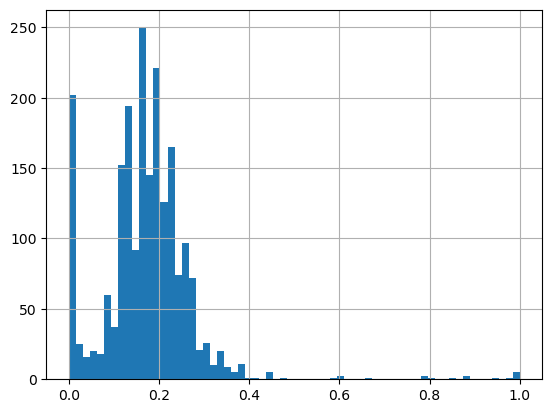

In [18]:
people_eda['BAC_RESULT VALUE'].hist(bins='auto');

3.Dropping columns

In [19]:
def dropna_columns(df, threshold=.8):
   return df.dropna(thresh=(((1-threshold) * df.shape[0])) + 1, axis=1)
 

In [20]:
crashes_dropped_df = dropna_columns(crashes_df)
people_dropped_df = dropna_columns(people_df)

In [21]:
crashes_dropped_df.shape

(1768106, 18)

In [22]:
people_dropped_df.shape

(1903272, 21)

In [23]:
crashes_dropped_df.columns

Index(['CRASH_UNIT_ID', 'CRASH_RECORD_ID', 'CRASH_DATE', 'UNIT_NO',
       'UNIT_TYPE', 'VEHICLE_ID', 'MAKE', 'MODEL', 'LIC_PLATE_STATE',
       'VEHICLE_YEAR', 'VEHICLE_DEFECT', 'VEHICLE_TYPE', 'VEHICLE_USE',
       'TRAVEL_DIRECTION', 'MANEUVER', 'OCCUPANT_CNT', 'AREA_01_I',
       'FIRST_CONTACT_POINT'],
      dtype='object')

In [24]:
people_dropped_df.columns

Index(['PERSON_ID', 'PERSON_TYPE', 'CRASH_RECORD_ID', 'VEHICLE_ID',
       'CRASH_DATE', 'SEAT_NO', 'CITY', 'STATE', 'ZIPCODE', 'SEX', 'AGE',
       'DRIVERS_LICENSE_STATE', 'DRIVERS_LICENSE_CLASS', 'SAFETY_EQUIPMENT',
       'AIRBAG_DEPLOYED', 'EJECTION', 'INJURY_CLASSIFICATION', 'DRIVER_ACTION',
       'DRIVER_VISION', 'PHYSICAL_CONDITION', 'BAC_RESULT'],
      dtype='object')

In [25]:
people_dropped_df.SEAT_NO.value_counts()


SEAT_NO
3.0     185995
6.0      64665
4.0      51255
5.0      18181
1.0      17218
2.0      16224
12.0     10156
7.0       8866
10.0      8645
11.0      3402
8.0        515
Name: count, dtype: int64

3.1Dropping columns that are not needed for modeling.


In [26]:
crashes_dropped_df.shape

(1768106, 18)

In [27]:
people_dropped_df.shape

(1903272, 21)

4.Merging all the data into one dataframe

Since we are focusing on predicting individual outcomes in crashes, we will merge on people_dropped_df in a left join with crashes_dropped_df so as to get the Target column based on the injury that each individual person incurred during the crash.

In [28]:
people_crashes_df = pd.merge(people_dropped_df, crashes_df, on='CRASH_RECORD_ID', how='left')

In [29]:
people_crashes_df.shape

(3998176, 91)

In [30]:
people_crashes_df.columns

Index(['PERSON_ID', 'PERSON_TYPE', 'CRASH_RECORD_ID', 'VEHICLE_ID_x',
       'CRASH_DATE_x', 'SEAT_NO', 'CITY', 'STATE', 'ZIPCODE', 'SEX', 'AGE',
       'DRIVERS_LICENSE_STATE', 'DRIVERS_LICENSE_CLASS', 'SAFETY_EQUIPMENT',
       'AIRBAG_DEPLOYED', 'EJECTION', 'INJURY_CLASSIFICATION', 'DRIVER_ACTION',
       'DRIVER_VISION', 'PHYSICAL_CONDITION', 'BAC_RESULT', 'CRASH_UNIT_ID',
       'CRASH_DATE_y', 'UNIT_NO', 'UNIT_TYPE', 'NUM_PASSENGERS',
       'VEHICLE_ID_y', 'CMRC_VEH_I', 'MAKE', 'MODEL', 'LIC_PLATE_STATE',
       'VEHICLE_YEAR', 'VEHICLE_DEFECT', 'VEHICLE_TYPE', 'VEHICLE_USE',
       'TRAVEL_DIRECTION', 'MANEUVER', 'TOWED_I', 'FIRE_I', 'OCCUPANT_CNT',
       'EXCEED_SPEED_LIMIT_I', 'TOWED_BY', 'TOWED_TO', 'AREA_00_I',
       'AREA_01_I', 'AREA_02_I', 'AREA_03_I', 'AREA_04_I', 'AREA_05_I',
       'AREA_06_I', 'AREA_07_I', 'AREA_08_I', 'AREA_09_I', 'AREA_10_I',
       'AREA_11_I', 'AREA_12_I', 'AREA_99_I', 'FIRST_CONTACT_POINT', 'CMV_ID',
       'USDOT_NO', 'CCMC_NO', 'ILCC_NO', 'C

In [31]:
people_crashes_df.INJURY_CLASSIFICATION.value_counts()

INJURY_CLASSIFICATION
NO INDICATION OF INJURY     3626576
NONINCAPACITATING INJURY     207788
REPORTED, NOT EVIDENT        121277
INCAPACITATING INJURY         38385
FATAL                          2341
Name: count, dtype: int64

In [32]:
print(people_dropped_df)
print(crashes_df)

        PERSON_ID PERSON_TYPE  \
0         O749947      DRIVER   
1         O871921      DRIVER   
2          O10018      DRIVER   
3          O10038      DRIVER   
4          O10039      DRIVER   
...           ...         ...   
1903267   P416604   PASSENGER   
1903268   P416605   PASSENGER   
1903269   P416647   PASSENGER   
1903270   P416660   PASSENGER   
1903271   P416663   PASSENGER   

                                           CRASH_RECORD_ID  VEHICLE_ID  \
0        81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...    834816.0   
1        af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...    827212.0   
2        71162af7bf22799b776547132ebf134b5b438dcf3dac6b...      9579.0   
3        c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...      9598.0   
4        eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...      9600.0   
...                                                    ...         ...   
1903267  7e5a5b5d5b4afc8e39325ec9b214b5aab69a6cc68bc570...   1793892.0   
1903268  7e

In [33]:
people_df.shape

(1903272, 29)

In [34]:
people_df.columns

Index(['PERSON_ID', 'PERSON_TYPE', 'CRASH_RECORD_ID', 'VEHICLE_ID',
       'CRASH_DATE', 'SEAT_NO', 'CITY', 'STATE', 'ZIPCODE', 'SEX', 'AGE',
       'DRIVERS_LICENSE_STATE', 'DRIVERS_LICENSE_CLASS', 'SAFETY_EQUIPMENT',
       'AIRBAG_DEPLOYED', 'EJECTION', 'INJURY_CLASSIFICATION', 'HOSPITAL',
       'EMS_AGENCY', 'EMS_RUN_NO', 'DRIVER_ACTION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'PEDPEDAL_ACTION', 'PEDPEDAL_VISIBILITY',
       'PEDPEDAL_LOCATION', 'BAC_RESULT', 'BAC_RESULT VALUE',
       'CELL_PHONE_USE'],
      dtype='object')

In [35]:
sex_incapac_fatal = pd.crosstab(people_crashes_df.SEX, people_crashes_df.INJURY_CLASSIFICATION)[:2][['FATAL', 'INCAPACITATING INJURY']]

In [36]:
sex_incapac_fatal

INJURY_CLASSIFICATION,FATAL,INCAPACITATING INJURY
SEX,,
F,652,16234
M,1615,21390


In [37]:
sex_incapac_fatal_percent = sex_incapac_fatal.copy()

In [38]:
sex_incapac_fatal_percent['FATAL']

SEX
F     652
M    1615
Name: FATAL, dtype: int64

In [39]:
sex_incapac_fatal_percent['FATAL'] = sex_incapac_fatal['FATAL'].apply(lambda x: x/sex_incapac_fatal['FATAL'].sum())
sex_incapac_fatal_percent['INCAPACITATING INJURY'] = sex_incapac_fatal['INCAPACITATING INJURY'].apply(lambda x: x/sex_incapac_fatal['INCAPACITATING INJURY'].sum())

In [40]:
sex_incapac_fatal_percent.T

SEX,F,M
INJURY_CLASSIFICATION,,
FATAL,0.287605,0.712395
INCAPACITATING INJURY,0.431480,0.568520


In [48]:
# creating target column
people_crashes_df['TARGET'] = people_crashes_df['INJURY_CLASSIFICATION'].map({np.NaN: 0, 
                                                                              'NO INDICATION OF INJURY': 0, 
                                                                              'NONINCAPACITATING INJURY': 1,
                                                                              'REPORTED, NOT EVIDENT': 1,
                                                                              'INCAPACITATING INJURY': 2,
                                                                              'FATAL': 3})
people_crashes_df['TARGET'].value_counts()

TARGET
0    3628385
1     329065
2      38385
3       2341
Name: count, dtype: int64

5.Split the data

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
people_crashes_df.shape

(3998176, 92)

In [44]:
X = people_crashes_df.drop(['PERSON_ID', 'CRASH_RECORD_ID', 'SAFETY_EQUIPMENT', 'ZIPCODE', 'SEAT_NO', 
                            'DRIVERS_LICENSE_STATE', 'CITY', 'AGE', 'SEX', 'DRIVERS_LICENSE_CLASS',
                            'INJURY_CLASSIFICATION', 'STATE'], axis=1)

y = people_crashes_df['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

6.Cleaning the data

In [45]:
from sklearn.model_selection import train_test_split
X_train.head()

,PERSON_TYPE,VEHICLE_ID_x,CRASH_DATE_x,AIRBAG_DEPLOYED,EJECTION,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,BAC_RESULT,CRASH_UNIT_ID,...,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT,VEHICLE_CONFIG,CARGO_BODY_TYPE,LOAD_TYPE,HAZMAT_OUT_OF_SERVICE_I,MCS_OUT_OF_SERVICE_I,HAZMAT_CLASS,TARGET
2169469,DRIVER,635092.0,06/10/2019 03:31:00 PM,DEPLOYMENT UNKNOWN,NONE,NONE,UNKNOWN,UNKNOWN,TEST NOT OFFERED,667113,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3295085,DRIVER,1525022.0,06/21/2023 07:14:00 PM,DEPLOYMENT UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,TEST NOT OFFERED,1602675,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2369388,DRIVER,75058.0,09/17/2016 10:15:00 AM,DID NOT DEPLOY,NONE,NONE,NOT OBSCURED,NORMAL,TEST NOT OFFERED,77602,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1101770,DRIVER,1276305.0,05/23/2022 10:35:00 AM,NOT APPLICABLE,NONE,NONE,NOT OBSCURED,NORMAL,TEST NOT OFFERED,1343372,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
455862,PASSENGER,632779.0,06/07/2019 12:20:00 PM,NOT APPLICABLE,NONE,NaN,NaN,NaN,NaN,664623,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


7.SEAT_NO

In [66]:
X_train.loc[people_crashes_df['SEAT_NO'].isna()]['PERSON_TYPE'].value_counts()

PERSON_TYPE
DRIVER                 2323761
PEDESTRIAN               36964
BICYCLE                  21591
NON-MOTOR VEHICLE         2647
NON-CONTACT VEHICLE        633
Name: count, dtype: int64

In [67]:
X_train.PERSON_TYPE.value_counts()

PERSON_TYPE
DRIVER                 2323761
PASSENGER               613036
PEDESTRIAN               36964
BICYCLE                  21591
NON-MOTOR VEHICLE         2647
NON-CONTACT VEHICLE        633
Name: count, dtype: int64

In [68]:
for col in X_train.columns:
    print(col)
    print(X_train[col].value_counts())
    print(X_train[col].isna().sum())
    print('--------------------')

PERSON_TYPE
PERSON_TYPE
DRIVER                 2323761
PASSENGER               613036
PEDESTRIAN               36964
BICYCLE                  21591
NON-MOTOR VEHICLE         2647
NON-CONTACT VEHICLE        633
Name: count, dtype: int64
0
--------------------
VEHICLE_ID_x
VEHICLE_ID_x
332155.0     98
366311.0     97
813017.0     84
1549159.0    82
1799384.0    81
             ..
403073.0      1
1150605.0     1
258389.0      1
1679881.0     1
151267.0      1
Name: count, Length: 1417541, dtype: int64
63249
--------------------
CRASH_DATE_x
CRASH_DATE_x
06/20/2023 06:23:00 PM    267
07/23/2023 02:08:00 AM    154
06/10/2024 10:41:00 AM    147
06/09/2020 05:30:00 AM    128
08/11/2023 03:03:00 PM    124
                         ... 
07/26/2020 09:55:00 PM      1
03/02/2023 06:30:00 AM      1
01/18/2017 07:55:00 AM      1
07/06/2023 07:39:00 AM      1
06/02/2021 06:30:00 PM      1
Name: count, Length: 558441, dtype: int64
0
--------------------
AIRBAG_DEPLOYED
AIRBAG_DEPLOYED
DID NOT DEPLOY  

In [51]:
def seat_no_transformer(df):
    '''
    Set all SEAT_NO = 1 if PERSON_TYPE = 'DRIVER'
    and fill the rest with 0.
    '''
    df.loc[(df.PERSON_TYPE == 'DRIVER'), 'SEAT_NO'] = 1
    df['SEAT_NO'].fillna(value=0, inplace=True)
    return df

In [ ]:
X_train_clean = cleaning_pipeline.fit_transform(X_train)

8.Model Iterations

In [46]:
def print_cv_scores(pipe, X, y):
    '''
    Runs cross_validate on given feature and multiclass target arrays using given pipeline, 
    printing the scoring results for both training and cross_val.
    '''
    scoring = ['accuracy','precision_macro', 'recall_macro', 'f1_macro']
    # we pass in pipe to cross validate along with a feature list.
    results = cross_validate(pipe, X, 
                                   y, 
                                   return_train_score=True, scoring=scoring)
    
    print(results['train_accuracy'])
    print('Training Accuracy', results['train_accuracy'].mean())
    print('##############')
    print(results['test_accuracy'])
    print('Cross_Val Accuracy', results['test_accuracy'].mean())
    print('##############')
    print('Training Macro Precision:', results['train_precision_macro'].mean())
    print('Cross_Val Macro Precision:', results['test_precision_macro'].mean())
    print('##############')
    print('Training Macro Recall:', results['train_recall_macro'].mean())
    print('Cross_Val Macro Recall:', results['test_recall_macro'].mean())
    print('##############')
    print('Training Macro F1:', results['train_f1_macro'].mean())
    print('Cross_Val Macro F1:', results['test_f1_macro'].mean())

8.1Dummy Classifier

In [47]:
dummy_pipe = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('dc', DummyClassifier(strategy='most_frequent'))
])

In [ ]:
dummy_pipe.fit(X_train_clean, y_train)